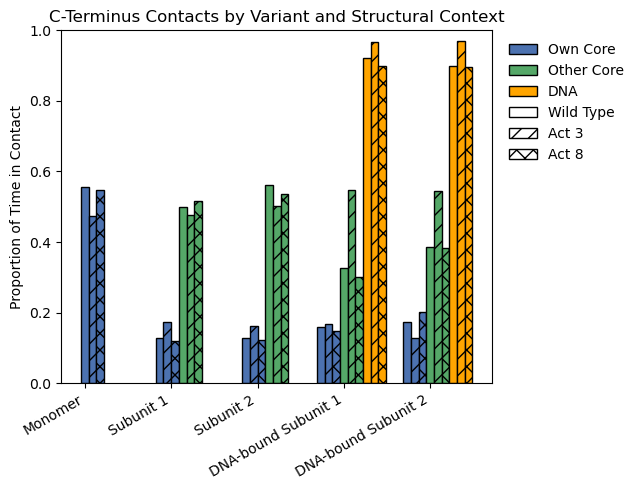

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# === SETUP ===
colors = {
    'own': '#4C72B0',
    'other': '#55A868',
    'dna': 'orange'
}
hatch_patterns = {
    0: '',        # WT
    1: '//',      # Act 3
    2: 'xx'       # Act 8
}
mutants = ['Wild Type', 'Act 3', 'Act 8']
variants = ['WT', 'A3', 'A8']

# === LOAD DATA ===

# Monomer: contact with own core
monomer_data = []
for var in variants:
    data = np.loadtxt(f'./posteq/{var}_M_c_contacts.dat', usecols=(1,), comments='#')
    monomer_data.append([np.mean(data != 0)])  # as list to match format

# Dimer Subunit 1: own, other
sub1_data = []
for var in variants:
    data = np.loadtxt(f'./posteq/{var}dim_c_contacts.dat', usecols=(1,2), comments='#')
    own = np.mean(data[:, 0] != 0)
    other = np.mean(data[:, 1] != 0)
    sub1_data.append([own, other])

# Dimer Subunit 2: other, own
sub2_data = []
for var in variants:
    data = np.loadtxt(f'./posteq/{var}dim_c_contacts.dat', usecols=(3,4), comments='#')
    other = np.mean(data[:, 0] != 0)
    own = np.mean(data[:, 1] != 0)
    sub2_data.append([own, other])

# DNA-bound Subunit 1: own, other, dna
dna1_data = []
for var in variants:
    data = np.loadtxt(f'./posteq/{var}dna_c_contacts.dat', usecols=(1,2,3), comments='#')
    own = np.mean(data[:, 0] != 0)
    other = np.mean(data[:, 1] != 0)
    dna = np.mean(data[:, 2] != 0)
    dna1_data.append([own, other, dna])

# DNA-bound Subunit 2: other, own, dna
dna2_data = []
for var in variants:
    data = np.loadtxt(f'./posteq/{var}dna_c_contacts.dat', usecols=(4,5,6), comments='#')
    other = np.mean(data[:, 0] != 0)
    own = np.mean(data[:, 1] != 0)
    dna = np.mean(data[:, 2] != 0)
    dna2_data.append([own, other, dna])

# === ORGANIZE FOR PLOTTING ===
all_data = [monomer_data, sub1_data, sub2_data, dna1_data, dna2_data]
group_labels = ['Monomer', 'Subunit 1', 'Subunit 2', 'DNA-bound Subunit 1', 'DNA-bound Subunit 2']
target_labels = [
    ['Own Core'], 
    ['Own Core', 'Other Core'], 
    ['Own Core', 'Other Core'], 
    ['Own Core', 'Other Core', 'DNA'], 
    ['Own Core', 'Other Core', 'DNA']
]
target_keys = [
    ['own'],
    ['own', 'other'],
    ['own', 'other'],
    ['own', 'other', 'dna'],
    ['own', 'other', 'dna']
]

# === PLOTTING ===
fig, ax = plt.subplots(figsize=(6.5, 5))

group_width = 0.8
n_groups = len(group_labels)
n_targets_max = max(len(t) for t in target_labels)
bar_width = group_width / (n_targets_max * 3)  # 3 variants per target

x_ticks = []
x_tick_labels = []

for i, (variant_data, targets, keys) in enumerate(zip(all_data, target_labels, target_keys)):
    n_targets = len(targets)
    for t_idx in range(n_targets):
        for v_idx in range(3):  # WT, A3, A8
            height = variant_data[v_idx][t_idx]
            x = i + (t_idx - (n_targets - 1)/2) * (3 * bar_width) + v_idx * bar_width
            ax.bar(
                x,
                height,
                width=bar_width,
                color=colors[keys[t_idx]],
                hatch=hatch_patterns[v_idx],
                edgecolor='black'
            )
    # Add group tick in the middle
    x_ticks.append(i)
    x_tick_labels.append(group_labels[i])

# === DECORATION ===
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels, rotation=30, ha='right')
ax.set_ylim(0, 1)
ax.set_ylabel('Proportion of Time in Contact')
ax.set_title('C-Terminus Contacts by Variant and Structural Context')

# === LEGENDS ===
from matplotlib.patches import Patch

# Contact target legend (colors)
color_legend = [Patch(facecolor=colors[k], edgecolor='black', label=lbl) 
                for k, lbl in zip(['own', 'other', 'dna'], ['Own Core', 'Other Core', 'DNA'])]

# Variant legend (hatches)
hatch_legend = [Patch(facecolor='white', edgecolor='black', hatch=hatch_patterns[i], label=mutants[i])
                for i in range(3)]

ax.legend(handles=color_legend + hatch_legend, bbox_to_anchor=(1.01, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig('grouped_cterm_contact_bars.pdf', bbox_inches='tight')
plt.show()


In [11]:
# Variant and group identifiers
mutants = ['Wild Type', 'Act 3', 'Act 8']
group_labels = ['Monomer', 'Subunit 1', 'Subunit 2', 'DNA-bound Subunit 1', 'DNA-bound Subunit 2']
target_labels = [
    ['Own Core'], 
    ['Own Core', 'Other Core'], 
    ['Own Core', 'Other Core'], 
    ['Own Core', 'Other Core', 'DNA'], 
    ['Own Core', 'Other Core', 'DNA']
]

all_data = [monomer_data, sub1_data, sub2_data, dna1_data, dna2_data]

# Print header
print("Variant\tGroup\tContact Target\tProportion")

# Loop through and print values
for group_name, group_data, targets in zip(group_labels, all_data, target_labels):
    for variant_idx, variant_name in enumerate(mutants):
        for target_idx, target_name in enumerate(targets):
            value = group_data[variant_idx][target_idx]
            print(f"{variant_name}\t{group_name}\t{target_name}\t{value:.4f}")

Variant	Group	Contact Target	Proportion
Wild Type	Monomer	Own Core	0.5559
Act 3	Monomer	Own Core	0.4740
Act 8	Monomer	Own Core	0.5477
Wild Type	Subunit 1	Own Core	0.1268
Wild Type	Subunit 1	Other Core	0.4996
Act 3	Subunit 1	Own Core	0.1738
Act 3	Subunit 1	Other Core	0.4780
Act 8	Subunit 1	Own Core	0.1186
Act 8	Subunit 1	Other Core	0.5156
Wild Type	Subunit 2	Own Core	0.1290
Wild Type	Subunit 2	Other Core	0.5613
Act 3	Subunit 2	Own Core	0.1623
Act 3	Subunit 2	Other Core	0.5035
Act 8	Subunit 2	Own Core	0.1223
Act 8	Subunit 2	Other Core	0.5376
Wild Type	DNA-bound Subunit 1	Own Core	0.1587
Wild Type	DNA-bound Subunit 1	Other Core	0.3275
Wild Type	DNA-bound Subunit 1	DNA	0.9226
Act 3	DNA-bound Subunit 1	Own Core	0.1683
Act 3	DNA-bound Subunit 1	Other Core	0.5462
Act 3	DNA-bound Subunit 1	DNA	0.9671
Act 8	DNA-bound Subunit 1	Own Core	0.1478
Act 8	DNA-bound Subunit 1	Other Core	0.2996
Act 8	DNA-bound Subunit 1	DNA	0.8992
Wild Type	DNA-bound Subunit 2	Own Core	0.1734
Wild Type	DNA-bound Subunit